# **LDOS**


In [15]:
import numpy as np
import matplotlib.pyplot as plt

from MTI_Differential_Equation import GMTI_NeumannBC
from MTI_Second_Order import GMTI2_NeumannBC, FMTI2_NeumannBC, Change_Basis

# labels for curves
Flabels = [["$f_{\\uparrow +, \\uparrow +}$", "$f_{\\uparrow +, \downarrow +}$", "$f_{\\uparrow +, \\uparrow -}$", "$f_{\\uparrow +, \downarrow -}$"],
          ["$f_{\downarrow +, \\uparrow +}$", "$f_{\downarrow +, \downarrow +}$", "$f_{\downarrow +, \\uparrow -}$", "$f_{\downarrow +, \downarrow -}$"],
          ["$f_{\\uparrow -, \\uparrow +}$", "$f_{\\uparrow -, \downarrow +}$", "$f_{\\uparrow -, \\uparrow -}$", "$f_{\\uparrow -, \downarrow -}$"],
          ["$f_{\downarrow -, \\uparrow +}$", "$f_{\downarrow -, \downarrow +}$", "$f_{\downarrow -, \\uparrow -}$", "$f_{\downarrow -, \downarrow -}$"]]

# colors for plotting
colors_real = ['brown', 'red', 'orange', 'gold']
# colors for plotting
colors_imag = ['blue','dodgerblue','lightskyblue','cyan']
# colors for plotting
colors_abs = ["#0077FF", "#00CC00", "#FFD700", "#FF2200"]

Local density of states of the quasiparticles can be computed from the normal Green's function as
$$
    \rho(z, \omega) = - \frac{1}{\pi} \Im \left\lbrack \text{Tr} \, \mathcal{G}^{(0)}_{MTI}(z,z; \omega) \right\rbrack \,.
$$

In [38]:
# density of state of the unperturbed system
def LDOS_unperturbed(d, z, kx, ky, L, omega, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, hbar=1., t=1.):

    # small imaginary part
    eta = 0.001
    # get normal Green's fucntion
    G = GMTI_NeumannBC(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=omega+1j*eta, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    # compute LDOS    
    ldos = -np.imag( np.trace(G) ) / np.pi
    
    return ldos


# density of state of the proximitized system
def LDOS_proximitized(d, z, kx, ky, L, mu, Delta, omega, Gamma, z0=0, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, hbar=1., t=1.):

    # small imaginary part
    eta = 0.001
    # get normal Green's fucntion
    G = GMTI2_NeumannBC(d=d, z=z, Z=z, z0=z0, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega+1j*eta, Gamma=Gamma, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar, t=t)
    # compute LDOS    
    ldos = -np.imag( np.trace(G) ) / np.pi
    
    return ldos


# parameters
d = 100.; mu = 0.010; Delta = 0.005; L = 0.010; z0 = 0.; kx = 0.; ky = 0.
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# array of energy
omega = np.linspace(-0., 0.050, 500)
# unperturbed LDOS
rho = np.array([LDOS_unperturbed(d=d, z=10., kx=kx, ky=ky, L=L, omega=e) for e in omega])


# array of energy
omega_2 = np.linspace(-Delta, Delta, 100)
# proximitized LDOS
rho_2 = np.array([LDOS_proximitized(d=d, z=5., kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=e, Gamma=Gamma) for e in omega_2])

print(rho.shape, rho_2.shape)

(500,) (100,)


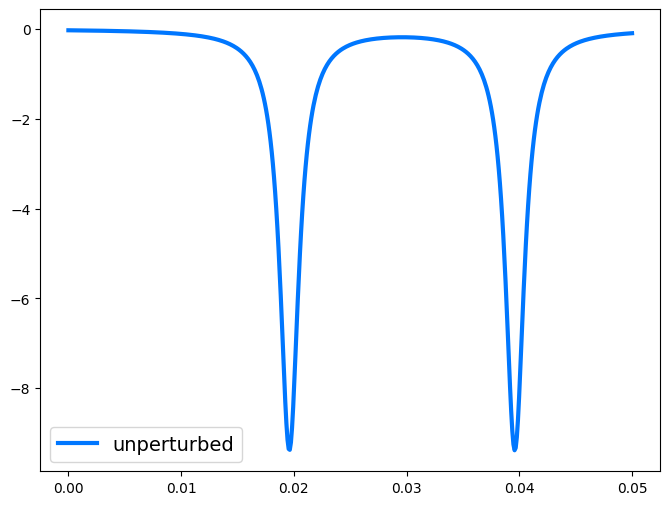

In [39]:
fig, ax = plt.subplots(1,1, figsize=(8, 6))

# plot unperturbed density of states
ax.plot(omega, rho, lw=3, c=colors_abs[0], label='unperturbed');
# plot proximitized density of states
#ax.plot(omega_2, rho_2, lw=3, c=colors_abs[-1], label='proximitized');

# plot 
ax.legend(fontsize=14);